<a href="https://colab.research.google.com/github/Huy987asd/BT/blob/main/Cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import matplotlib.pyplot as plt
from keras.datasets import cifar10
(x_train,y_train) , (x_test,y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 12s 0us/step


In [2]:

x_train.shape

(50000, 32, 32, 3)

In [3]:

y_train.shape

(50000, 1)

In [4]:


x_test.shape

(10000, 32, 32, 3)

In [5]:

y_test.shape
     

(10000, 1)

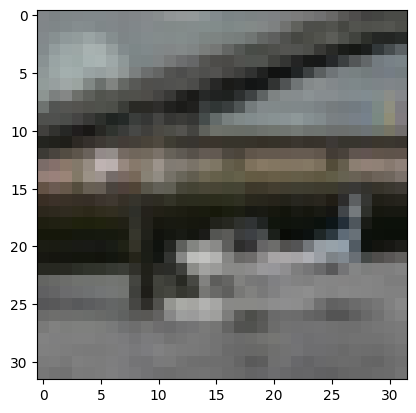

Hình [[[130 134 137]
  [125 131 133]
  [128 135 137]
  ...
  [ 68  69  66]
  [ 74  75  71]
  [ 74  75  71]]

 [[129 134 137]
  [127 134 136]
  [129 137 139]
  ...
  [ 81  82  77]
  [ 84  85  80]
  [ 77  78  73]]

 [[131 137 140]
  [135 144 145]
  [143 153 154]
  ...
  [ 36  38  36]
  [ 35  37  35]
  [ 39  42  40]]

 ...

 [[128 128 128]
  [127 127 127]
  [125 125 125]
  ...
  [108 108 108]
  [112 112 112]
  [116 116 116]]

 [[123 123 123]
  [124 124 124]
  [120 120 120]
  ...
  [101 101 101]
  [108 108 108]
  [112 112 112]]

 [[119 119 119]
  [115 115 115]
  [114 114 114]
  ...
  [107 107 107]
  [108 108 108]
  [115 115 115]]]


In [6]:

digit = x_train[812]
plt.imshow(digit,cmap = plt.cm.binary)
plt.show()
print('Hình', x_train[812])

<ipython-input-7-667916c02bdb>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,5,i+1)


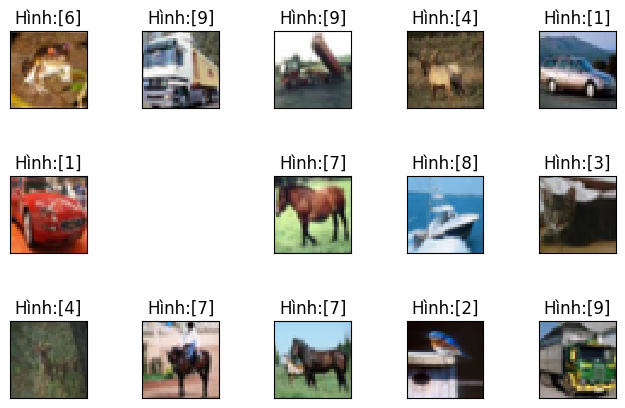

In [7]:
for i in range (15):
  plt.subplot(3,5,i+1)
  plt.tight_layout()
  plt.imshow(x_train[i], cmap='gray', interpolation="none")
  plt.title("Hình:{}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])

In [8]:

from keras.models import Sequential
from keras.layers import Dense

In [9]:

model = Sequential()
model.add(Dense(5000, activation="relu", input_shape = (32*32*3,)))
model.add(Dense(3000, activation= 'relu'))
model.add(Dense(1000, activation= 'relu'))
model.add(Dense(500, activation= 'relu'))
model.add(Dense(100, activation= 'relu'))
model.add(Dense(10, activation='softmax'))

In [10]:


model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5000)              15365000  
                                                                 
 dense_1 (Dense)             (None, 3000)              15003000  
                                                                 
 dense_2 (Dense)             (None, 1000)              3001000   
                                                                 
 dense_3 (Dense)             (None, 500)               500500    
                                                                 
 dense_4 (Dense)             (None, 100)               50100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 33,920,610
Trainable params: 33,920,610
No

In [11]:

x = x_test
y = y_test
     

In [12]:

x_train = x_train.reshape(50000,32*32*3)
x_train = x_train.astype('float32')/255
x_test = x_test.reshape(10000,32*32*3)
x_test = x_test.astype('float32')/255

In [13]:

from keras.utils import to_categorical
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [14]:

model.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs = 10, batch_size = 128)
test_loss, test_acc=model.evaluate(x_test, y_test)564                              
print('Mất mát:',test_loss)
print('Độ chính xác:',test_acc)

Epoch 1/10
391/391 [==============================] - 410s 1s/step - loss: 2.2189 - accuracy: 0.2217
Epoch 2/10
391/391 [==============================] - 432s 1s/step - loss: 1.8842 - accuracy: 0.3159
Epoch 3/10
391/391 [==============================] - 440s 1s/step - loss: 1.7883 - accuracy: 0.3572
Epoch 4/10
391/391 [==============================] - 440s 1s/step - loss: 1.7144 - accuracy: 0.3854
Epoch 5/10
391/391 [==============================] - 440s 1s/step - loss: 1.6625 - accuracy: 0.4037
Epoch 6/10
391/391 [==============================] - 441s 1s/step - loss: 1.6160 - accuracy: 0.4182
Epoch 7/10
391/391 [==============================] - 440s 1s/step - loss: 1.5758 - accuracy: 0.4367
Epoch 8/10
391/391 [==============================] - 437s 1s/step - loss: 1.5406 - accuracy: 0.4488
Epoch 9/10
391/391 [==============================] - 435s 1s/step - loss: 1.5067 - accuracy: 0.4608
Epoch 10/10
313/313 [==============================] - 27s 84ms/step - loss: 1.5324 - accur

In [15]:

model.save('test1.h5')

In [18]:

img = plt.imread('/content/drive/MyDrive/cho-2.jpg')
plt.imshow(img)

FileNotFoundError: ignored

In [19]:

import numpy as np
from keras.utils import load_img, img_to_array
img=load_img('/content/drive/MyDrive/cho-3.jpg', target_size=(32,32)) #filename
plt.imshow(img)
img=img_to_array(img)
img = img.reshape(1,32*32*3)
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img),axis =1)

FileNotFoundError: ignored